In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
# Load the dataset
df = pd.read_csv("../data/sierraleone-bumbuna.csv")  
print("Shape:", df.shape)
df.head()

Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


### Data Profiling, Summary Statistics & Missing Values

In [ ]:
# Summary stats
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [12]:
# Missing values
missing = df.isnull().sum()
missing[missing > 0]

Comments    525600
dtype: int64

In [13]:
# % missing per column
missing_pct = df.isnull().mean() * 100
missing_pct[missing_pct > 5]

Comments    100.0
dtype: float64

In [ ]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [9]:
# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
print("Date range:", df['Timestamp'].min(), "→", df['Timestamp'].max())


Date range: 2021-10-30 00:01:00 → 2022-10-30 00:00:00


### Outlier Detection Using Z-score

In [14]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(zscore(df[columns_to_check]))
outliers = (z_scores > 3)
outlier_counts = pd.DataFrame(outliers, columns=columns_to_check).sum()
outlier_counts


GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

### Data Cleaning and save the clean data

In [15]:
df_clean = df.copy()

# Remove negative irradiance values
for col in ['GHI', 'DNI', 'DHI']:
    df_clean[col] = df_clean[col].apply(lambda x: max(x, 0))

# Replace 0s in wind speed with NaN and fill
df_clean['WS'] = df_clean['WS'].replace(0, np.nan)
df_clean['WS'].fillna(df_clean['WS'].median(), inplace=True)

# Drop 'Comments' column if empty
if 'Comments' in df_clean.columns:
    df_clean.drop(columns=['Comments'], inplace=True)

# Fix data types
df_clean['Cleaning'] = df_clean['Cleaning'].astype(bool)
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Fill other missing values
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)


C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_2824\2529152171.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['WS'].fillna(df_clean['WS'].median(), inplace=True)


In [16]:
df_clean.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-30 12:00:30.000000768,204.406778,116.523731,116.273677,206.643095,198.114691,26.319394,79.448857,1.680375,1.691606,0.363823,133.044668,7.172220,999.876469,0.004806,32.504263,32.593091
min,2021-10-30 00:01:00,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.100000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,10.700000,11.100000
25%,2022-01-29 06:00:45,0.000000,0.000000,0.000000,0.000000,0.000000,23.100000,68.700000,1.200000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,23.500000,23.800000
50%,2022-04-30 12:00:30,0.300000,0.000000,0.000000,3.600000,3.400000,25.300000,85.400000,1.600000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,26.600000,26.900000
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,40.900000,41.300000
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,2.400000,72.800000,70.400000
std,NaN,296.787520,218.573992,157.020868,300.896893,288.889073,4.398605,20.520775,0.938333,1.617053,0.295000,114.284792,7.535093,2.104419,0.047556,12.434899,12.009161


In [ ]:
df_clean.to_csv('../data/sierra_leone_clean.csv', index=False)

### Time Series Plots

d:\@kaim\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


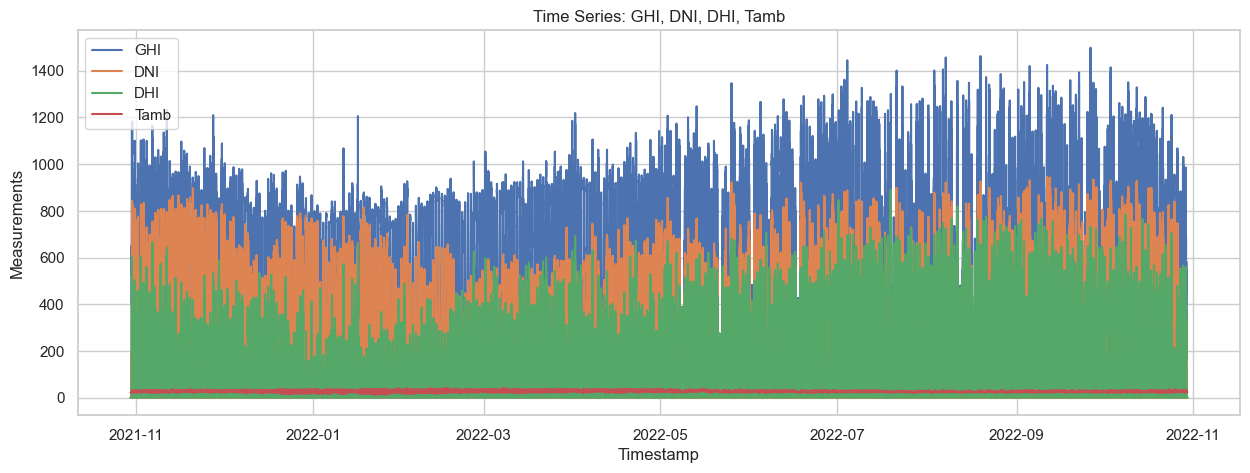

In [19]:
plt.figure(figsize=(15, 5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_clean['Timestamp'], df_clean[col], label=col)

plt.legend()
plt.title('Time Series: GHI, DNI, DHI, Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Measurements')
plt.grid(True)
plt.show()

# Cleaning Impact on ModA & ModB

<Figure size 1200x500 with 0 Axes>

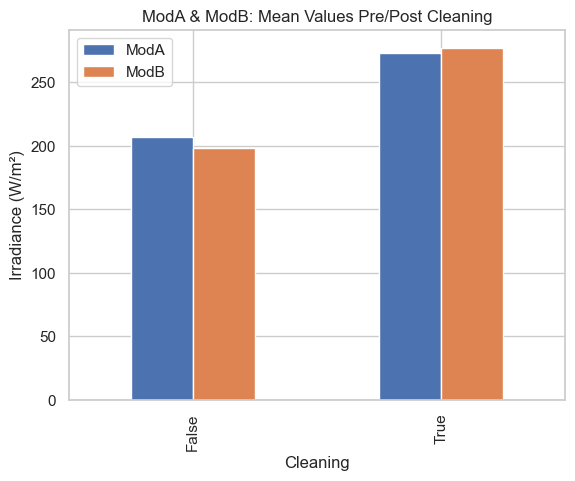

In [26]:
plt.figure(figsize=(12, 5))
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('ModA & ModB: Mean Values Pre/Post Cleaning')
plt.ylabel('Irradiance (W/m²)')
plt.grid(True)
plt.show()

# Correlation Heatmap

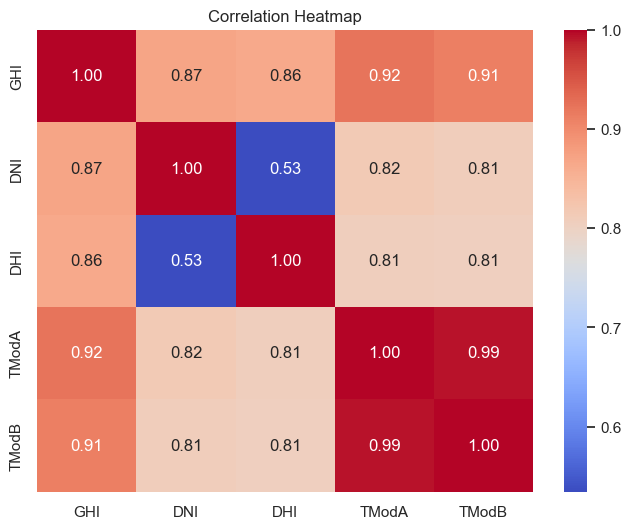

In [27]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plots

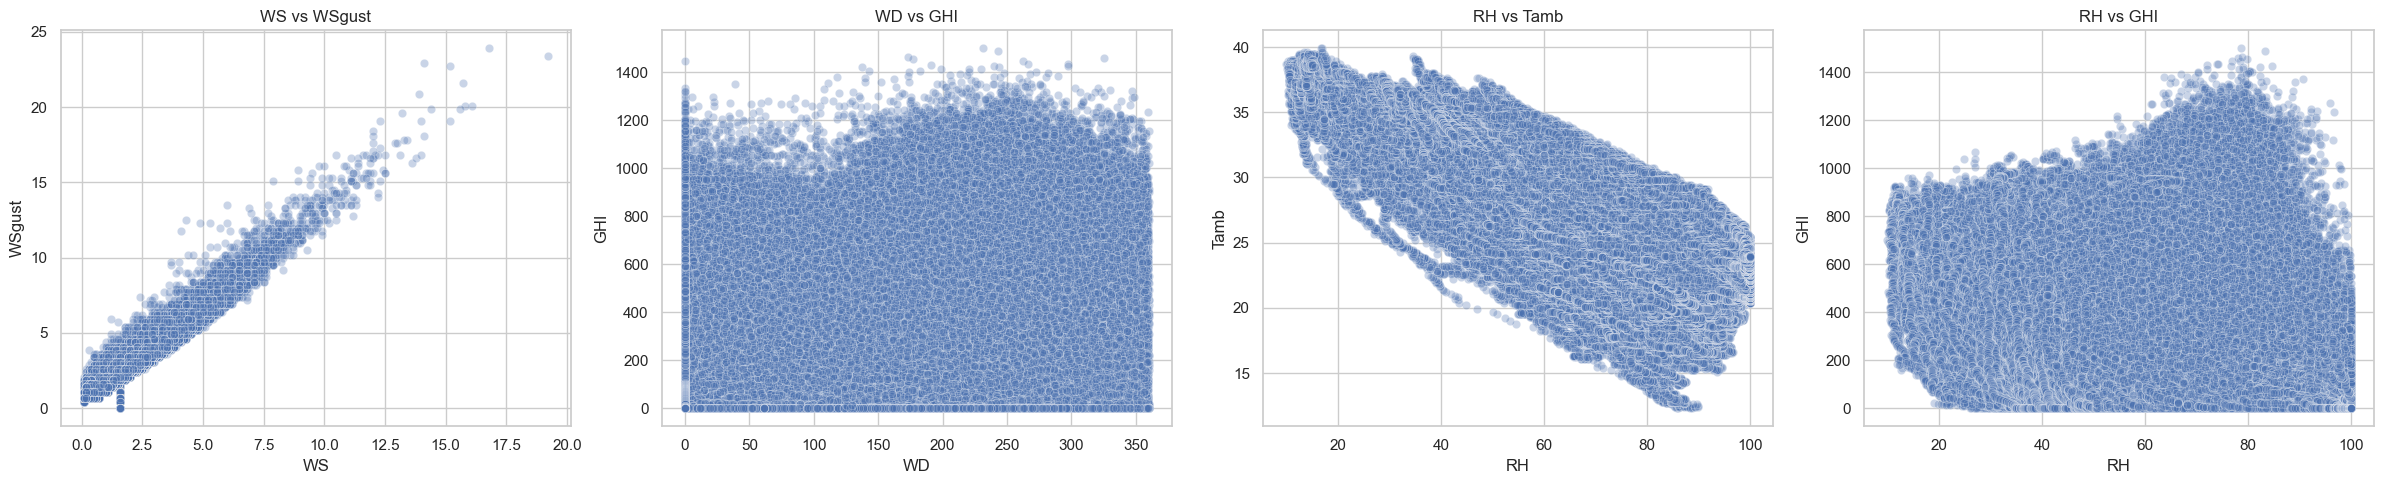

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# WS vs WSgust
sns.scatterplot(ax=axes[0], data=df_clean, x='WS', y='WSgust', alpha=0.3)
axes[0].set_title('WS vs WSgust')

# WD vs GHI
sns.scatterplot(ax=axes[1], data=df_clean, x='WD', y='GHI', alpha=0.3)
axes[1].set_title('WD vs GHI')

# RH vs Tamb
sns.scatterplot(ax=axes[2], data=df_clean, x='RH', y='Tamb', alpha=0.3)
axes[2].set_title('RH vs Tamb')

# RH vs GHI
sns.scatterplot(ax=axes[3], data=df_clean, x='RH', y='GHI', alpha=0.3)
axes[3].set_title('RH vs GHI')

plt.tight_layout()
plt.show()

# Wind Distribution & Histogram

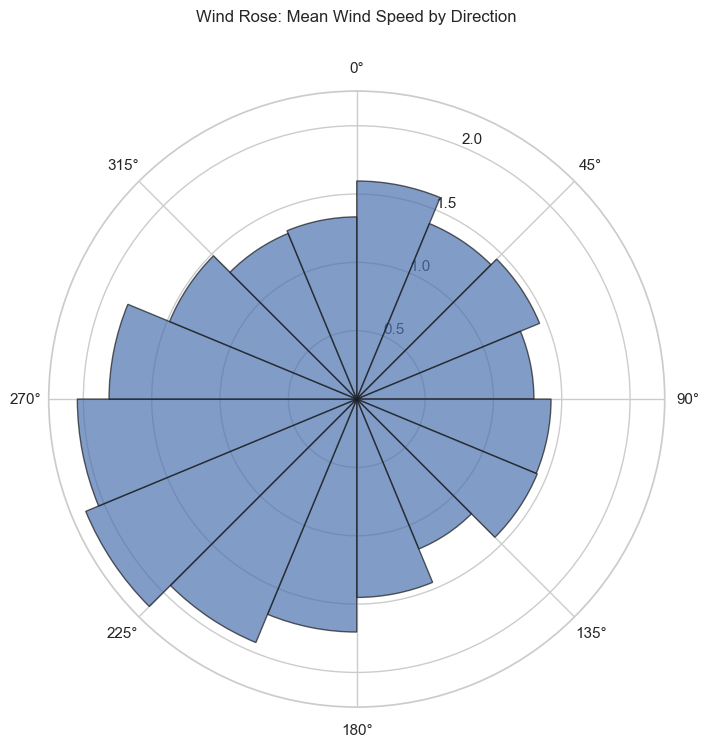

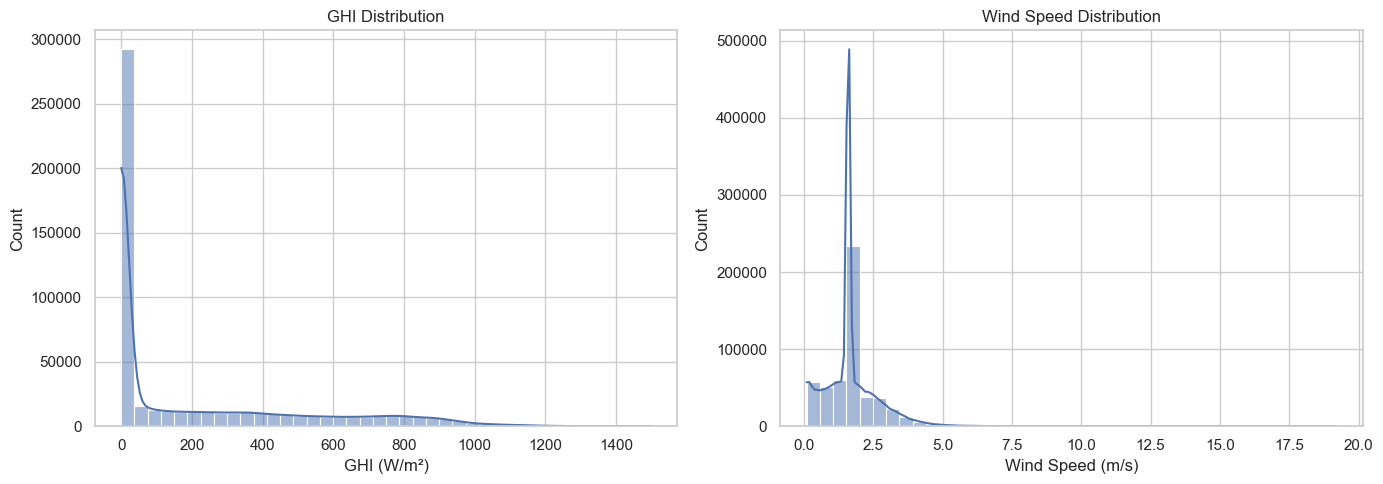

In [35]:
# Prepare wind direction in radians and wind speed
wd_rad = np.deg2rad(df_clean['WD'])
ws = df_clean['WS']

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
# Use bins for wind direction (e.g., 16 sectors)
bins = np.linspace(0, 2 * np.pi, 17)
wd_bin = np.digitize(wd_rad, bins) - 1
ws_mean = [ws[wd_bin == i].mean() for i in range(len(bins)-1)]

bars = ax.bar(bins[:-1], ws_mean, width=(2 * np.pi / 16), align='edge', edgecolor='k', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Mean Wind Speed by Direction', y=1.1)
plt.show()

# Histograms for GHI and WS
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_clean['GHI'], bins=40, kde=True, ax=axes[0])
axes[0].set_title('GHI Distribution')
axes[0].set_xlabel('GHI (W/m²)')

sns.histplot(df_clean['WS'], bins=40, kde=True, ax=axes[1])
axes[1].set_title('Wind Speed Distribution')
axes[1].set_xlabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

# Temperature Analysis

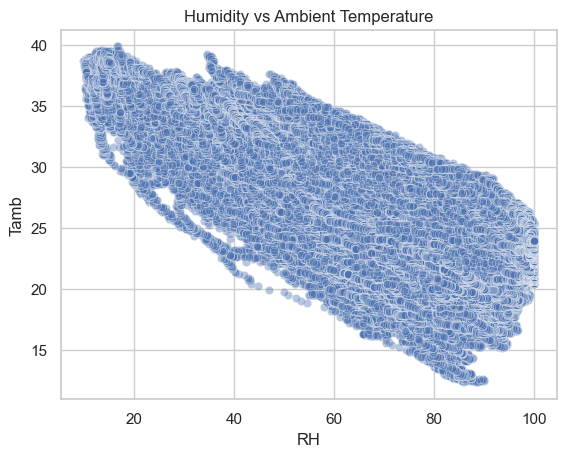

In [36]:
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.4)
plt.title('Humidity vs Ambient Temperature')
plt.grid(True)
plt.show()

# Bubble Chart

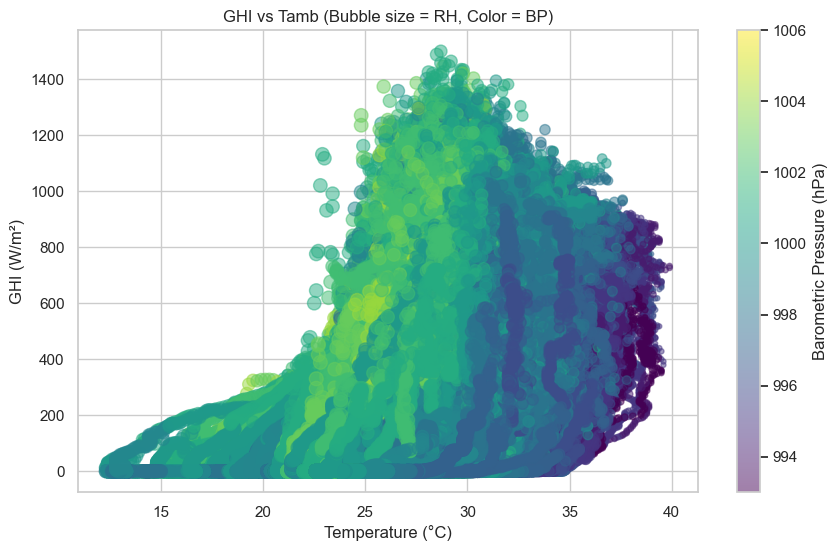

In [37]:
plt.figure(figsize=(10, 6))
bubble = plt.scatter(
    df_clean['Tamb'], df_clean['GHI'],
    s=df_clean['RH'], alpha=0.5, c=df_clean['BP'], cmap='viridis'
)
plt.colorbar(bubble, label='Barometric Pressure (hPa)')
plt.title('GHI vs Tamb (Bubble size = RH, Color = BP)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()